<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [288]:
import pandas as pd
pd.options.mode.chained_assignment = None
import datetime
import matplotlib.pyplot as plt

In [289]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='	')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [290]:
df.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8774,15,4380000.0,39.4,2017-12-20T00:00:00,1,2.60,10.0,16.9,6,NaN,...,10.2,2.0,Санкт-Петербург,20504.0,22216.0,0.0,NaN,0.0,NaN,45.0
10307,5,6400000.0,52.2,2016-06-23T00:00:00,2,3.00,5.0,32.8,4,NaN,...,7.9,0.0,Санкт-Петербург,31633.0,4725.0,1.0,549.0,3.0,174.0,68.0
22015,2,6084227.0,70.4,2018-10-28T00:00:00,3,2.65,16.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,37131.0,11228.0,1.0,674.0,1.0,705.0,22.0
21240,20,10800000.0,95.0,2017-08-11T00:00:00,3,2.70,5.0,67.0,5,NaN,...,14.0,1.0,Санкт-Петербург,33328.0,13713.0,0.0,NaN,2.0,95.0,377.0
5144,9,18100000.0,116.0,2016-10-10T00:00:00,3,NaN,19.0,NaN,19,NaN,...,NaN,0.0,Санкт-Петербург,18941.0,4530.0,0.0,NaN,0.0,NaN,311.0


In [292]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


- Максимальная высота полотков 100 метров при значении третьего квартиля - 2.8

- Максимальное количество комнат - 19, что выглядит нереалистично.

- Большой разброс длительности продаж (от 1 до 1580 дней),

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод
В столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition есть пропущённые значения. Пропущенные значения в столбцах, сформированных на основе данных, заполненных пользователями, могли возникнуть из-за того, что пользователи не знали или не захотели указывать какие-то данные, указание которых не было обязательным. Пропущенные значения в столбцах, данные которых расчитывались автоматически, вероятно, возникли из-за того, что было недостаточно данных для расчёта.

Столбец is_apartment типа object, а не bool.

Нужно изменить тип данных на int в столбцах: floors_total, balcony, parks_around3000, ponds_around3000, days_exposition, потому что количество дней, этажей, балконов, парков и водоёмов не должно быть дробным.

В столбце first_day_exposition нужно изменить формат данных на datetime, в столбце locality_name привести все значения к нижнему регистру.

## Предобработка данных

In [295]:
df['locality_name'] = df['locality_name'].str.lower()

In [296]:
df.duplicated().sum()

0

In [297]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [298]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [299]:
df.query('ceiling_height.isna() == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,санкт-петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,санкт-петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [300]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [301]:
df.query('ceiling_height.isna() == False').sort_values(by='ceiling_height', ascending=False).groupby('ceiling_height').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,...,11.00,5.0,санкт-петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,...,16.50,4.0,санкт-петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,...,8.00,NaN,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.50,24.0,37.7,19,False,...,11.00,2.0,санкт-петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.00,4.0,22.0,2,NaN,...,10.00,1.0,санкт-петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,9,1650000.0,35.5,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,...,6.50,NaN,санкт-петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0


In [302]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Пропущенные значения в столбце ceiling_height заменены на медианные.

In [303]:
df.loc[(df['ceiling_height'] >= 3.5) & (df['ceiling_height'] < 2), 'ceiling_height'] = df['ceiling_height'].median()

Слишком большие значения в столбце ceiling_height заменены на медиану.

In [304]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [305]:
def mean_median_fillna(data):
    mean = df['floors_total'].mean()
    median = df['floors_total'].median()
    floors_total = data['floors_total']
    if floors_total != floors_total:
        if mean < median:
            floors_total = mean
            return floors_total
        else:
            floors_total = median
            return floors_total
    return floors_total
df['floors_total'] = df.apply(mean_median_fillna, axis=1)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропущенные значения в столбце floors_total заменены на меньшее значение, после сравнения сренего и медианы.

In [306]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [307]:
df.query('balcony.isna() == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,NaN,...,6.00,NaN,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,...,13.83,NaN,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,NaN,...,8.50,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,NaN,...,NaN,NaN,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [309]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [310]:
for column in ['balcony', 'parks_around3000', 'ponds_around3000']:
    df[column] = df[column].fillna(0)

Пропущенные значения в столбце balcony, parks_around3000 и ponds_around3000 заменены на 0. Предполагается, что балконов, парков и водоёмов нет, если их количество не указали.

In [311]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменён тип данных в столбце first_day_exposition на datetime.

In [312]:
df['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Найдена самая поздняя дата публикации объявления.

In [313]:
df.query('first_day_exposition == first_day_exposition.max() and days_exposition.isna() == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


У объявлений с самой поздней датой публикации не указана продолжительность размещения объявлений. Предположительно в этот день производилась выгрузка.

In [314]:
df.query('days_exposition.isna() == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.3,7,NaN,...,7.00,0.0,санкт-петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,санкт-петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,NaN,...,15.60,0.0,санкт-петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,...,NaN,0.0,село рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [315]:
df['days_exposition'] = df['days_exposition'].fillna((df['first_day_exposition'].max() - df['first_day_exposition']).dt.days)

Найдена разница между самой поздней датой и датой публикации. Пропущенные значения в столбе days_exposition заменены на эту разницу в днях.

In [316]:
for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    df[column] = df[column].astype('int')

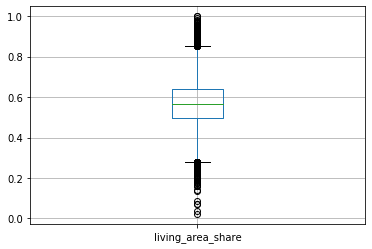

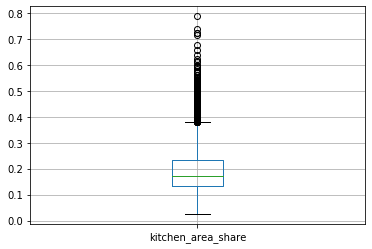

In [317]:
df['living_area_share'] = df['living_area'] / df['total_area']
df.groupby('rooms')['living_area_share'].mean()
df.boxplot(column='living_area_share')
plt.show()
df['kitchen_area_share'] = df['kitchen_area'] / df['total_area']
df.groupby('rooms')['kitchen_area'].mean()
df.boxplot(column='kitchen_area_share')
plt.show()

In [318]:
display(df.groupby('rooms')['living_area_share'].mean())
display(df['living_area_share'].mean())
display()
display(df.groupby('rooms')['kitchen_area_share'].mean())
display(df['kitchen_area_share'].mean())

rooms
0     0.685467
1     0.485989
2     0.579287
3     0.625302
4     0.646489
5     0.641377
6     0.668819
7     0.657981
8     0.667001
9     0.612299
10    0.645065
11    0.710093
12    0.455222
14    0.648695
15    0.693220
16    0.666667
19    0.706086
Name: living_area_share, dtype: float64

0.5647655216993234

rooms
0          NaN
1     0.249906
2     0.174163
3     0.140928
4     0.124031
5     0.113455
6     0.104150
7     0.091932
8     0.091708
9     0.075054
10    0.088013
11    0.066855
12    0.124444
14    0.075636
15    0.169492
16    0.048148
19    0.073679
Name: kitchen_area_share, dtype: float64

0.1873547387717406

In [319]:
df['living_area'] = df['living_area'].fillna(df['total_area']*df['living_area_share'].mean())
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*df['kitchen_area_share'].mean())
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_share,kitchen_area_share
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,57,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,NaN,...,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,NaN,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.797718,9,NaN,...,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,0.320000,0.410000


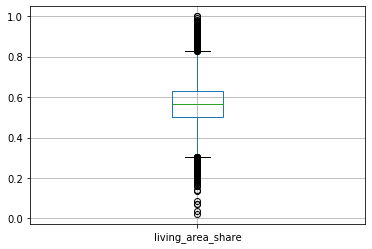

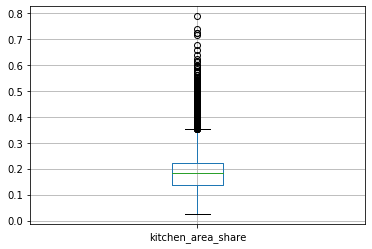

In [320]:
df['living_area_share'] = df['living_area'] / df['total_area']
df.groupby('rooms')['living_area_share'].mean()
df.boxplot(column='living_area_share')
plt.show()
df['kitchen_area_share'] = df['kitchen_area'] / df['total_area']
df.groupby('rooms')['kitchen_area'].mean()
df.boxplot(column='kitchen_area_share')
plt.show()

In [321]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3

In [322]:
for dtype in ['float64','int64','object', 'bool']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float64 columns: 0.17 MB
Average memory usage for int64 columns: 0.16 MB
Average memory usage for object columns: 1.07 MB
Average memory usage for bool columns: 0.02 MB


In [323]:
len(df['locality_name'].unique()) / df['locality_name'].count()

0.015433403805496829

Уникальных значений в столбце 'locality_name' меньше 50%, менять тип данных на 'category' нет смысла, потому что это приведёт к повышению уровня использования памяти.

In [324]:
memory_usage_before = pd.DataFrame([['int', ('{:03.2f} MB'.format(df.select_dtypes(include=['int']).memory_usage(deep=True).sum() / 1024 ** 2))] , ['float', ('{:03.2f} MB'.format(df.select_dtypes(include=['float']).memory_usage(deep=True).sum() / 1024 ** 2))]])
display(memory_usage_before)

,0,1
0,int,1.45 MB
1,float,1.99 MB


In [325]:
for column in ['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']:
    df[column] = df[column].astype('uint8')
df['days_exposition'] = df['days_exposition'].astype('uint16')
for column in ['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area']:
    df[column] = df[column].astype('float32')

In [326]:
memory_usage_after = pd.DataFrame([['int', ('{:03.2f} MB'.format(df.select_dtypes(include=['int']).memory_usage(deep=True).sum() / 1024 ** 2))] , ['float', ('{:03.2f} MB'.format(df.select_dtypes(include=['float']).memory_usage(deep=True).sum() / 1024 ** 2))]])
display(memory_usage_after)

,0,1
0,int,0.00 MB
1,float,1.08 MB


Использование памяти уменьшилось по столбцам с int на 75%, с float - на 47%

- uint8 - потому что в столбцах 'total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000' все значения целые и меньше 255.

- uint16 - потому что в столбце 'days_exposition' значения целые и меньше 65535.

In [327]:
df.query('is_apartment.isna() == False')['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [328]:
df['is_apartment'] = df['is_apartment'].fillna('False')
df['is_apartment'].isna().sum()

0

In [329]:
df['is_apartment'] = df['is_apartment'].astype('bool')

Пропущенные значения в столбце is_apartment заменены на False, тип данных в столбце изменён на bool.

In [330]:
df.dropna(subset=['locality_name'], inplace=True)

Так как нужно будет составить рейтинг населённых пунктов, а пропущенных значений в столбце locality_name не слишком много (49 из 23699 - 0,2%), их можно удалить.

In [331]:
df.query('parks_around3000 > 0 and parks_nearest.isna() == True')
df.query('ponds_around3000 > 0 and ponds_nearest.isna() == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_share,kitchen_area_share


Пропущенные значения в стобцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest оставлены без изменений, потому что они рассчитывались на основе картографических данных и потому что в строках, где количество парков и водоёмов в радиусе трёх километров больше нуля, нет пропущенных значений, а расстояние до центра и аэропорта никак не проверить.

Пропущенные значения в столбцах с жилой прощадью и площадью кухни заменены на значения, рассчитанные с помощью средней доли жилой площади и площади кухни в общей площади. Т.к. по при группировке по комнатам значительных различий не выявлено, использован усреднённый коэффициент.

## Расчёты и добавление результатов в таблицу

In [332]:
df['metr_price'] = df['last_price'] / df['total_area']
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday_name
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month_name()
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
def floor_category(data):
    row1 = data['floor']
    row2 = data['floors_total']
    if row1 == row2:
        return 'последний'
    elif row1 == 1:
        return 'первый'
    return 'другой'
    
df['floor_category'] = df.apply(floor_category, axis=1)
df.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_share,kitchen_area_share,metr_price,weekday_exposition,month_exposition,year_exposition,floor_category
23694,9,9700000.0,133.809998,2017-03-21,3,3.70,5,73.300003,3,True,...,3,381.0,773,0.547792,0.103356,72490.843750,Tuesday,March,2017,другой
23695,14,3100000.0,59.000000,2018-01-15,3,2.65,5,38.000000,4,True,...,0,NaN,45,0.644068,0.144068,52542.371094,Monday,January,2018,другой
23696,18,2500000.0,56.700001,2018-02-11,2,2.65,3,29.700001,1,True,...,0,NaN,446,0.523810,0.187355,44091.710938,Sunday,February,2018,первый
23697,13,11475000.0,76.750000,2017-03-28,2,3.00,17,43.345753,12,True,...,3,196.0,602,0.564766,0.303583,149511.406250,Tuesday,March,2017,другой
23698,4,1350000.0,32.299999,2017-07-21,1,2.50,5,12.300000,1,True,...,0,NaN,651,0.380805,0.278638,41795.667969,Friday,July,2017,первый


Добавлены столбцы с ценой за квадратный метр, днём недели, месяцем и годом публикации объявления.

Этажи категоризированы.

## Исследовательский анализ данных

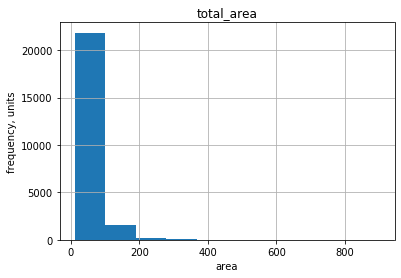

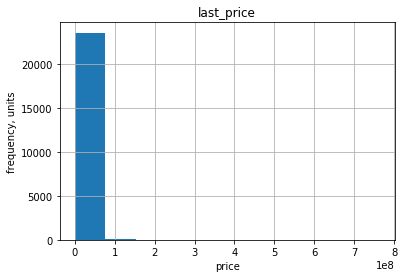

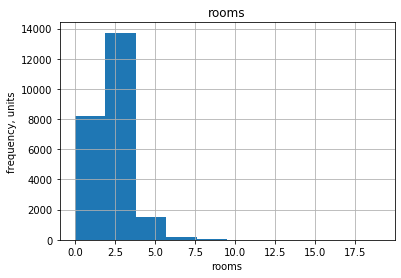

Text(0, 0.5, 'frequency, units')

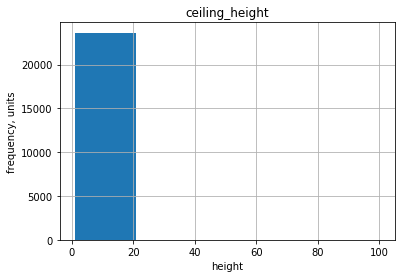

In [333]:
df['total_area'].hist()
plt.title('total_area')
plt.xlabel('area')
plt.ylabel('frequency, units')
plt.show()
df['last_price'].hist()
plt.title('last_price')
plt.xlabel('price')
plt.ylabel('frequency, units')
plt.show()
df['rooms'].hist()
plt.title('rooms')
plt.xlabel('rooms')
plt.ylabel('frequency, units')
plt.show()
df['ceiling_height'].hist(bins=5)
plt.title('ceiling_height')
plt.xlabel('height')
plt.ylabel('frequency, units')

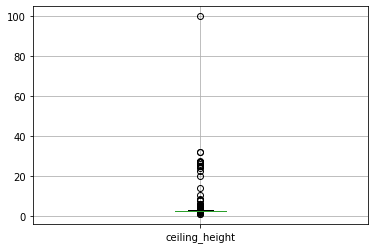

In [334]:
df.boxplot(column='ceiling_height')

In [335]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_share,kitchen_area_share,metr_price,weekday_exposition,month_exposition,year_exposition,floor_category
5712,5,1500000.0,42.799999,2017-08-14,2,1.20,2,27.500000,1,True,...,0,NaN,248,0.642523,0.121495,35046.730469,Monday,August,2017,первый
16934,5,4100000.0,40.000000,2017-10-17,1,1.75,37,17.400000,5,True,...,3,80.0,71,0.435000,0.208500,102500.000000,Tuesday,October,2017,другой
22590,16,6000000.0,55.000000,2018-10-31,2,1.00,12,32.400002,7,True,...,2,289.0,13,0.589091,0.181818,109090.906250,Wednesday,October,2018,другой


In [336]:
df.query('2 < ceiling_height < 2.4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_share,kitchen_area_share,metr_price,weekday_exposition,month_exposition,year_exposition,floor_category
227,13,2200000.0,47.000000,2018-01-12,3,2.34,5,26.543980,1,True,...,0,NaN,45,0.564766,0.187355,46808.511719,Friday,January,2018,первый
1582,4,4100000.0,45.599998,2016-01-13,2,2.30,9,28.400000,8,False,...,1,525.0,329,0.622807,0.153509,89912.281250,Wednesday,January,2016,другой
5498,17,2200000.0,56.000000,2018-04-02,2,2.30,5,45.000000,1,True,...,0,NaN,55,0.803571,0.160714,39285.714844,Monday,April,2018,первый
12755,2,1400000.0,22.500000,2017-09-21,1,2.20,2,18.000000,2,True,...,0,NaN,45,0.800000,0.200000,62222.222656,Thursday,September,2017,последний
17762,20,2300000.0,54.299999,2018-06-28,3,2.30,5,39.000000,2,True,...,0,NaN,189,0.718232,0.097606,42357.273438,Thursday,June,2018,другой
17794,1,2300000.0,58.599998,2016-05-12,3,2.25,5,44.100002,3,False,...,0,NaN,45,0.752560,0.093857,39249.148438,Thursday,May,2016,другой
23498,7,1600000.0,54.000000,2016-12-26,2,2.30,1,33.000000,1,False,...,0,NaN,281,0.611111,0.064815,29629.628906,Monday,December,2016,последний


Text(0, 0.5, 'frequency, units')

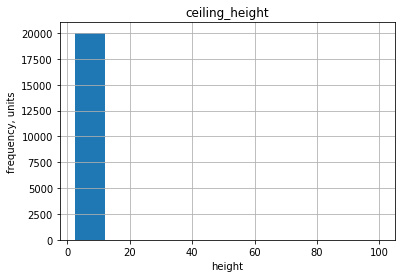

In [337]:
df.query('ceiling_height > 2.5')['ceiling_height'].hist(bins=10)
plt.title('ceiling_height')
plt.xlabel('height')
plt.ylabel('frequency, units')

Судя по гистограме, стоит отбросить значения высоты потолков меньше 2,5 метров.

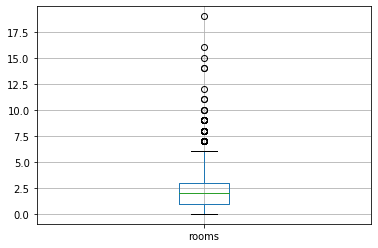

In [338]:
df.boxplot(column='rooms')

In [339]:
df['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

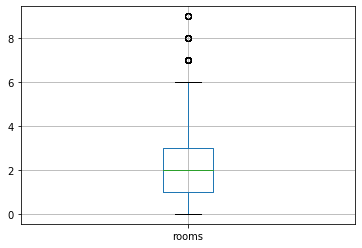

In [340]:
df.query('rooms <10').boxplot(column='rooms')

In [341]:
df.groupby('year_exposition')['first_day_exposition'].count()

year_exposition
2014     136
2015    1173
2016    2765
2017    8185
2018    8512
2019    2879
Name: first_day_exposition, dtype: int64

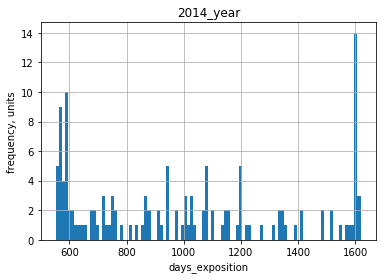

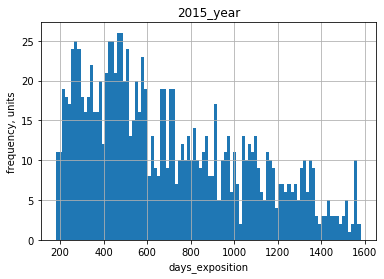

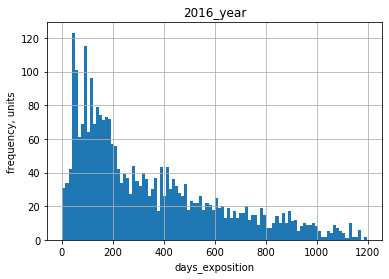

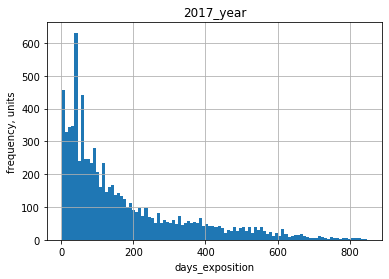

Text(0, 0.5, 'frequency, units')

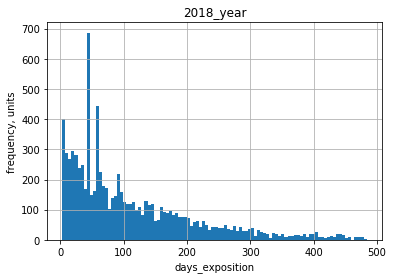

In [342]:
df.query('year_exposition == 2014')['days_exposition'].hist(bins=100)
plt.title('2014_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('year_exposition == 2015')['days_exposition'].hist(bins=100)
plt.title('2015_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('year_exposition == 2016')['days_exposition'].hist(bins=100)
plt.title('2016_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('year_exposition == 2017')['days_exposition'].hist(bins=100)
plt.title('2017_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('year_exposition == 2018')['days_exposition'].hist(bins=100)
plt.title('2018_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

В 2014 году продажи занимали от 200 до 1600 дней, в 2015 - от 200 до 1600, в 2016 - от 0 до 1200, в 2017 - от 0 до 800, в 2018 - от 0 до 500. Количество продаж из года в год росло. Быстрые продажи появились в 2016 году.

Text(0, 0.5, 'frequency, units')

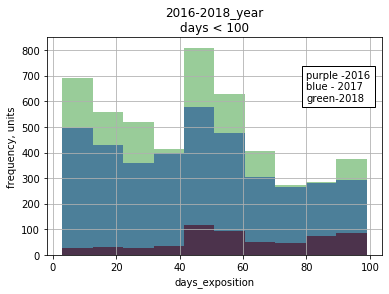

In [343]:
df.query('year_exposition == 2016 and days_exposition < 100')['days_exposition'].hist(color='red')
df.query('year_exposition == 2017 and days_exposition < 100')['days_exposition'].hist(alpha=0.5, color='blue')
df.query('year_exposition == 2018 and days_exposition < 100')['days_exposition'].hist(alpha=0.4, color='green')
box = {'facecolor':'white'}
plt.text(80, 600, 'purple -2016\nblue - 2017\ngreen-2018', bbox=box)
plt.title('2016-2018_year\ndays < 100')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

Text(0, 0.5, 'frequency, units')

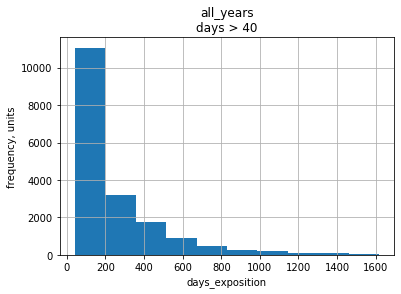

In [344]:
df.query('days_exposition > 40')['days_exposition'].hist()
plt.title('all_years\ndays > 40')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

Text(0, 0.5, 'frequency, units')

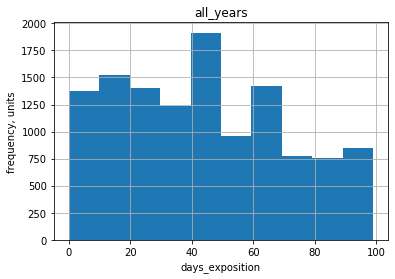

In [345]:
df.query('days_exposition < 100')['days_exposition'].hist()
plt.title('all_years')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

На гистограмме данные с 2016 по 2018 год для длительности продаж меньше 100 дней. Пики на 0 и на 40 днях. Такие же пики на гистограмме с данными по всем годам.

Можно считать продажи меньше 40 дней слишком быстрыми.

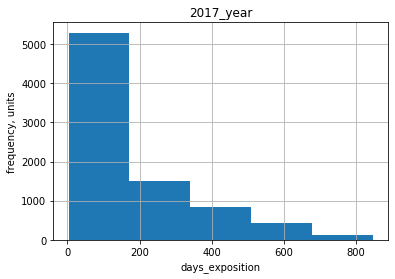

Text(0, 0.5, 'frequency, units')

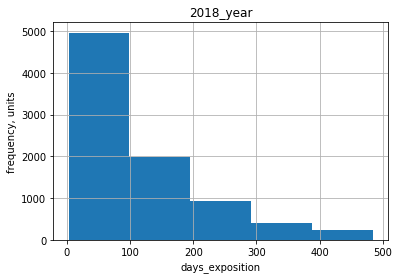

In [346]:
df.query('year_exposition == 2017')['days_exposition'].hist(bins=5)
plt.title('2017_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('year_exposition == 2018')['days_exposition'].hist(bins=5)
plt.title('2018_year')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

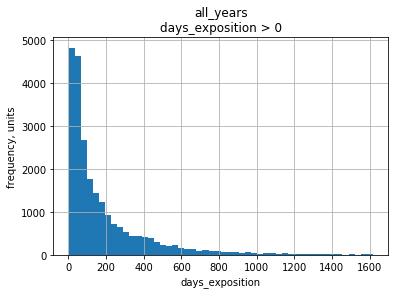

mean 185.71441860465117
median 94.0


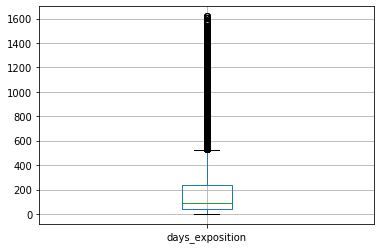

In [347]:
df.query('days_exposition > 0')['days_exposition'].hist(bins=50)
plt.title('all_years\ndays_exposition > 0')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
print('mean', df['days_exposition'].mean())
print('median', df['days_exposition'].median())
df.boxplot(column='days_exposition')

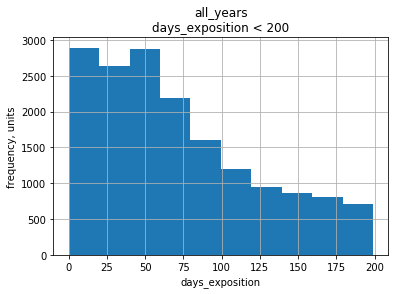

Text(0, 0.5, 'frequency, units')

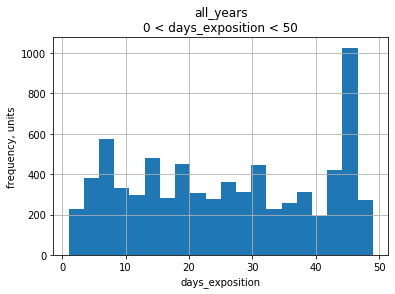

In [348]:
df.query('days_exposition < 200')['days_exposition'].hist()
plt.title('all_years\ndays_exposition < 200')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('0 < days_exposition < 50')['days_exposition'].hist(bins=20)
plt.title('all_years\n0 < days_exposition < 50')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

Text(0, 0.5, 'frequency, units')

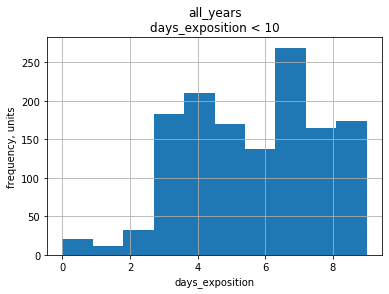

In [349]:
df.query('days_exposition < 10')['days_exposition'].hist()
plt.title('all_years\ndays_exposition < 10')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

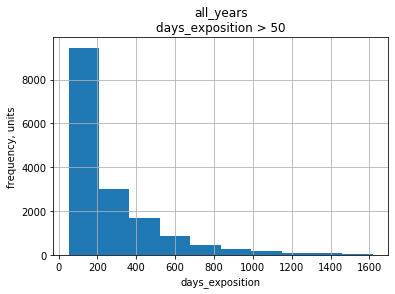

Text(0, 0.5, 'frequency, units')

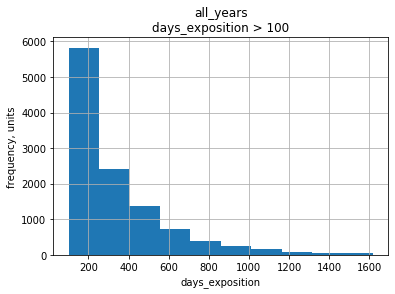

In [350]:
df.query('days_exposition > 50')['days_exposition'].hist()
plt.title('all_years\ndays_exposition > 50')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')
plt.show()
df.query('days_exposition > 100')['days_exposition'].hist()
plt.title('all_years\ndays_exposition > 100')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

В среднем продажа занимает 185 дней. Продажи больше 1000 дней можно считать очень долгими. На диаграмме размаха по длительности продаж выбросов нет. Нулевые значения длительности, часть из которых появилась после замены пропущенных значений (2019 год), можно отбросить. Мне кажется, что пик до 200 дней очень резкий, но я не понимаю, как это проверить. Если отбросить значения меньше 200, потеряется половина данных.

Text(0, 0.5, 'frequency, units')

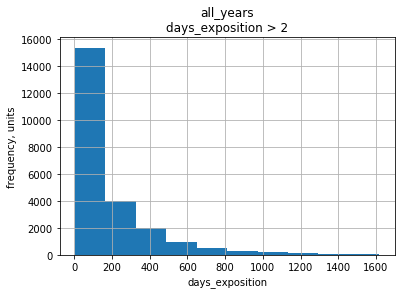

In [351]:
df.query('days_exposition > 2')['days_exposition'].hist()
plt.title('all_years\ndays_exposition > 2')
plt.xlabel('days_exposition')
plt.ylabel('frequency, units')

In [352]:
df = df.query('days_exposition > 40')

,price_with,corr
0,area,0.700434
1,rooms,0.386553
2,cityCenters_nearest,-0.228376
3,floor,0.031099
4,days_exposition,0.106273


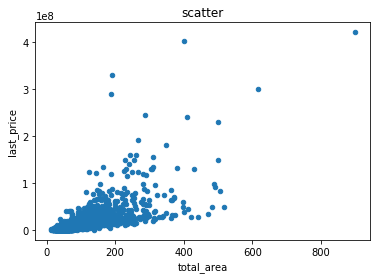

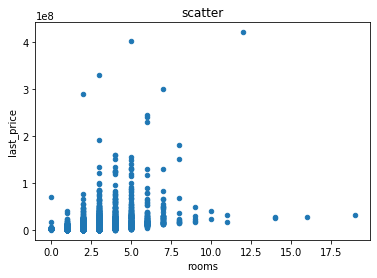

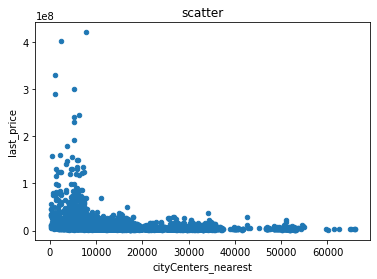

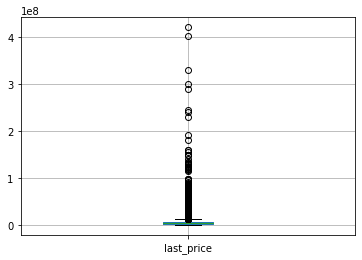

In [353]:
all_corr = pd.DataFrame([['area', df['last_price'].corr(df['total_area'])], ['rooms', df['last_price'].corr(df['rooms'])], ['cityCenters_nearest', df['last_price'].corr(df['cityCenters_nearest'])], ['floor', df['last_price'].corr(df['floor'])], ['days_exposition', df['last_price'].corr(df['days_exposition'])]], columns=['price_with', 'corr'])
display(all_corr)
df.plot(y='last_price', x='total_area', kind='scatter', title='scatter')
plt.show()
df.plot(y='last_price', x='rooms', kind='scatter', title='scatter')
plt.show()
df.plot(y='last_price', x='cityCenters_nearest', kind='scatter', title='scatter')
plt.show()
df.boxplot(column='last_price')

In [354]:
df.groupby('floor_category')['last_price'].median()

floor_category
другой       4900000.0
первый       3900000.0
последний    4350000.0
Name: last_price, dtype: float32

In [355]:
display(df.pivot_table(index='year_exposition', values='last_price'))
display(df.pivot_table(index='month_exposition', values='last_price'))
display(df.pivot_table(index='weekday_exposition', values='last_price'))

,last_price
year_exposition,
2014,12046600.0
2015,8592727.0
2016,6859233.0
2017,6685275.0
2018,6189577.0
2019,7270442.0


,last_price
month_exposition,
April,7058607.0
August,6472755.5
December,7308295.5
February,6619794.0
January,6945596.5
July,6965450.5
June,6413608.0
March,6523029.0
May,6604317.0


,last_price
weekday_exposition,
Friday,6650631.0
Monday,6650976.5
Saturday,6880361.0
Sunday,6435431.5
Thursday,6969484.0
Tuesday,6546524.5
Wednesday,6906703.0


Средняя цена не зависит от дня недели и месяца, менялась по годам, имеет тенденцию к снижению.

In [356]:
top_locality = df['locality_name'].value_counts().head(10)
top_locality_stat = df.query('locality_name.isin(@top_locality.index)').pivot_table(index='locality_name', values=('last_price', 'total_area'))
display(top_locality)
display(top_locality_stat)
print('населённый пункт с самой высокой стоимостью жилья -', top_locality_stat.query('last_price == last_price.max()').index[0])
print('населённый пункт с самой низкой стоимостью жилья -', top_locality_stat.query('last_price == last_price.min()').index[0])

санкт-петербург      11751
посёлок мурино         371
посёлок шушары         343
всеволожск             333
пушкин                 295
посёлок парголово      251
колпино                248
гатчина                242
деревня кудрово        229
выборг                 192
Name: locality_name, dtype: int64

,last_price,total_area
locality_name,,
всеволожск,3778245.00,55.578407
выборг,3293218.75,57.140938
гатчина,3503055.00,51.747852
деревня кудрово,4230228.50,46.391048
колпино,4136537.25,55.514961
посёлок мурино,3705409.25,44.827816
посёлок парголово,4529340.50,51.793705
посёлок шушары,4111618.00,53.798222
пушкин,6545578.50,62.122337


населённый пункт с самой высокой стоимостью жилья - санкт-петербург
населённый пункт с самой низкой стоимостью жилья - выборг


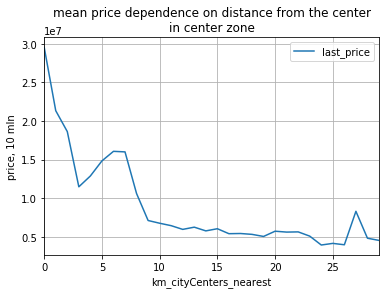

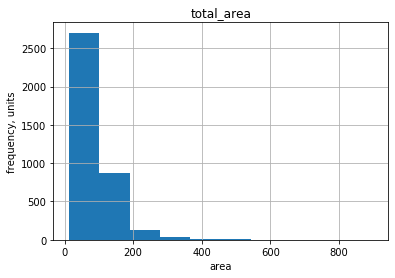

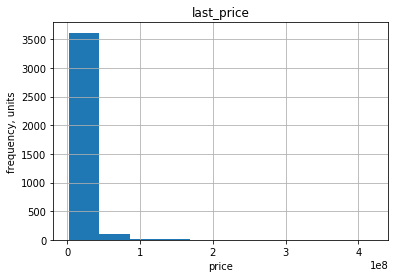

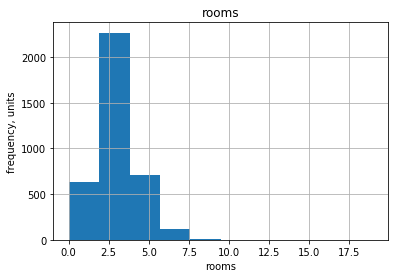

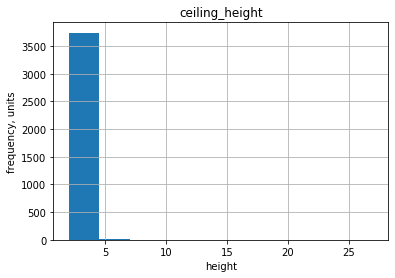

Text(0, 0.5, 'frequency, units')

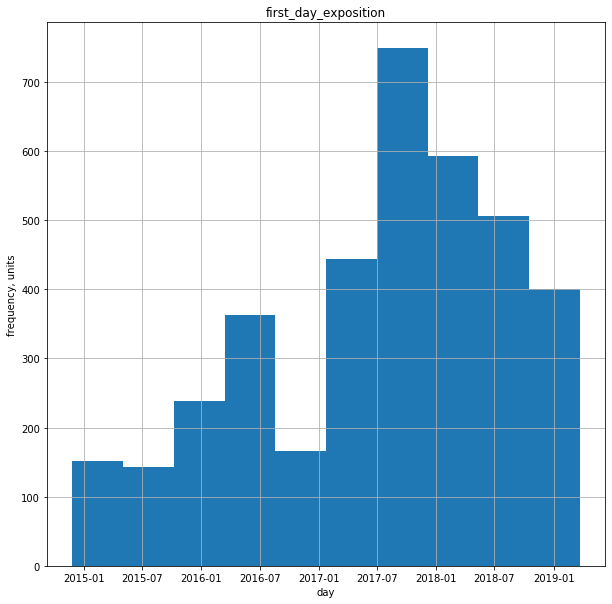

In [357]:
df_sp = df.query('locality_name == "санкт-петербург"')
df_sp['km_cityCenters_nearest'] = (df_sp['cityCenters_nearest']/1000).round()
df_sp.pivot_table(index='km_cityCenters_nearest', values='last_price').plot(grid=True, title='mean price dependence on distance from the center\nin center zone')
plt.ylabel('price, 10 mln')
plt.show()
sp_center = df_sp.query('km_cityCenters_nearest < 10')
center_corr = pd.DataFrame([['area', sp_center['last_price'].corr(sp_center['total_area'])], ['rooms', sp_center['last_price'].corr(sp_center['rooms'])], ['cityCenters_nearest', sp_center['last_price'].corr(sp_center['cityCenters_nearest'])], ['floor', sp_center['last_price'].corr(sp_center['floor'])], ['days_exposition', sp_center['last_price'].corr(sp_center['days_exposition'])]], columns=['price_with', 'corr'])
sp_center['total_area'].hist()
plt.title('total_area')
plt.xlabel('area')
plt.ylabel('frequency, units')
plt.show()
sp_center['last_price'].hist()
plt.title('last_price')
plt.xlabel('price')
plt.ylabel('frequency, units')
plt.show()
sp_center['rooms'].hist()
plt.title('rooms')
plt.xlabel('rooms')
plt.ylabel('frequency, units')
plt.show()
sp_center['ceiling_height'].hist()
plt.title('ceiling_height')
plt.xlabel('height')
plt.ylabel('frequency, units')
plt.show()
sp_center['first_day_exposition'].hist(figsize=(10,10))
plt.title('first_day_exposition')
plt.xlabel('day')
plt.ylabel('frequency, units')

Text(0, 0.5, 'frequency, units')

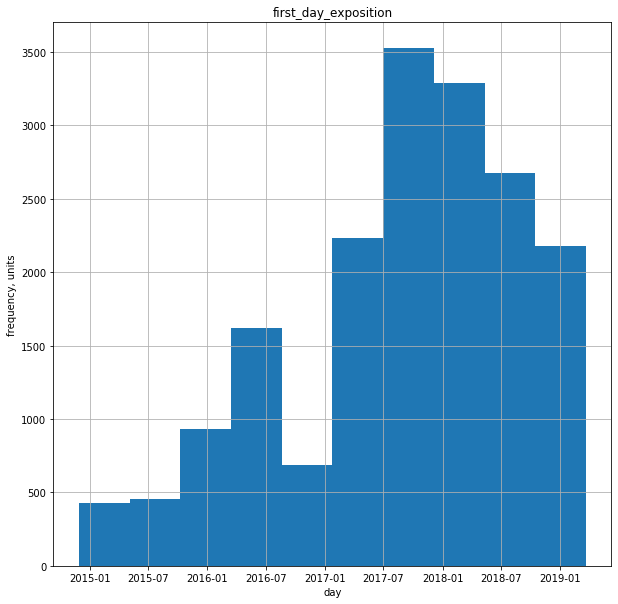

In [358]:
df['first_day_exposition'].hist(figsize=(10,10))
plt.title('first_day_exposition')
plt.xlabel('day')
plt.ylabel('frequency, units')

In [359]:
print('весь город:')
display(all_corr)
print('центральная зона:')
display(center_corr)

весь город:


,price_with,corr
0,area,0.700434
1,rooms,0.386553
2,cityCenters_nearest,-0.228376
3,floor,0.031099
4,days_exposition,0.106273


центральная зона:


,price_with,corr
0,area,0.692414
1,rooms,0.359761
2,cityCenters_nearest,-0.125679
3,floor,0.099760
4,days_exposition,0.084346


Прямая зависимость есть между ценой и общей площадью квартиры, как в городе в целом, так и в центральной зоне.
Коэффициенты кореляции практически одинаковые. Судя по диаграммам, зависимость от дня размещения объявления в городе в целом и в центральной зоне одинаковая.

## Общий вывод

Странные данные по высоте потолков и количеству комнат (потолки 20-30 метров, 15-19 комнат).
Пик длительности продаж на нуле дней. Это пик длительности продаж прослеживается с 2016 год. При анализе длительности продаж от 0 до 100 дней обнаружено два пика - на 0 и на 40 днях. Далее при анализе отброщены продажи длительностью менее 40 дней.
Продажи длительностью менее 40 дней мжно считать слишком быстрыми, продажи длительностью более 1000 дней - слишком долгими.

Пик размещения объявлений пришёлся на период с июля 2017 года по январь 2018.

Средняя цена не зависит от дня недели и месяца, менялась по годам, имеет тенденцию к снижению.
Выявлена прямая корреляция (коэффициент корреляции - 0,7) между ценой и общей площадью квартиры, как в городе в целом, так и в центральной зоне. Корреляция с другими параметрами (количество комнат, расстояние до центра города, этаж, длительность продажи, день размещения объявления) не выявлена.
населённый пункт с самой высокой средней стоимостью жилья - Санкт-петербург (8 451 458.00), с самой низкой - Выборг (3 293 218.75).